In [1]:
# re: regular expression     https://docs.python.org/3/library/re.html

In [25]:
# \  escape character
# \d  match a number   \w match a digit   \s match a space
# * match any number of characters (includes 0)   + match at least one character   ?  match 0 or 1 character

In [22]:
print('a b  c'.split(' '))  # cannot recognise consecutive spaces

['a', 'b', '', 'c']


In [26]:
re.split(r'\s+', 'a b c  d')   # deal with variable length patterns

['a', 'b', 'c', 'd']

In [3]:
import re 

phone = '2021-959-559* #'
num = re.sub(r'\D', "", phone)   # remove characters that are not digits
print(num)


2021959559


In [2]:
import re

print(re.search('www', 'www.googlewww.com'))  # exact match. only returns the first match

<re.Match object; span=(0, 3), match='www'>


In [37]:
it = re.finditer(r"\d+","12a32bc43jf3")   #Find all substrings matched by the regular expression in the string
print(list(it)) 

#it = re.finditer(r"\d+","12a32bc43jf3")    
#for match in it:
#    print(match.group())



[<re.Match object; span=(0, 2), match='12'>, <re.Match object; span=(3, 5), match='32'>, <re.Match object; span=(7, 9), match='43'>, <re.Match object; span=(11, 12), match='3'>]


In [5]:
# time: get time of a Python program's execution

import time

start_time = time.time()
i = 10000
while i > 0:
    i -= 1 
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0009291172027587891 seconds ---


###  read configurations into a Python script

In [6]:
# use yaml package

import yaml

with open('./example.yaml', 'r') as f:
    config = yaml.load(f.read(), Loader=yaml.FullLoader)
print(config)


{'MODEL': {'TYPE': 'generalized_rcnn', 'CONV_BODY': 'ResNet.add_ResNet50_conv4_body', 'NUM_CLASSES': 81, 'FASTER_RCNN': True}, 'NUM_GPUS': 8, 'SOLVER': {'WEIGHT_DECAY': 0.0001, 'LR_POLICY': 'steps_with_decay', 'BASE_LR': 0.01, 'GAMMA': 0.1, 'MAX_ITER': 180000, 'STEPS': [0, 120000, 160000]}, 'TRAIN': {'WEIGHTS': 'https://dl.fbaipublicfiles.com/detectron/ImageNetPretrained/MSRA/R-50.pkl', 'DATASETS': "('coco_2014_train', 'coco_2014_valminusminival')", 'SCALES': '(800,)', 'MAX_SIZE': 1333, 'IMS_PER_BATCH': 1, 'BATCH_SIZE_PER_IM': 512}, 'TEST': {'DATASETS': "('coco_2014_minival',)", 'SCALE': 800, 'MAX_SIZE': 1333, 'NMS': 0.5, 'RPN_PRE_NMS_TOP_N': 6000, 'RPN_POST_NMS_TOP_N': 1000}, 'OUTPUT_DIR': '.'}


In [7]:
num_gpus = config['NUM_GPUS']
print(num_gpus)

8


In [8]:
print(config['MODEL']['TYPE'])

generalized_rcnn


In [9]:
# use argparser, logging. See .py file

In [10]:
# shutil, used for copy/rename/remove files/directories
import shutil 

shutil.copyfile('example.yaml', 'new.yaml')
shutil.move('new.yaml', '../')

Error: Destination path '../new.yaml' already exists

### important built_in functions in Python (lambda, filter, map, reduce)

In [ ]:
# lambda: define a function without name

# lambda arg1, arg2, arg3:expression

def multiplication(a,b,c,d):
    return a*b*c*d

f = lambda a,b,c,d:a*b*c*d  # f points to an anoynoumous function
print(f)
print(f(1,2,3,4))


In [ ]:
# use lambda with sorted() function
# sorted(iterable, key=None, reverse=False). https://docs.python.org/3/library/functions.html#sorted

a = [('b', 4), ('a', 5), ('d', 7), ('h', 6), ('j', 3)]
sorted_a = sorted(a, key=lambda x:x[1], reverse=True)
print(sorted_a)

In [ ]:
# filter(): filter elements in an iterable object   
# input:  a judgement function and an iterable object
# output: an iterator

def is_even(n): 
    return n % 2 == 0

output = filter(is_even, range(10))   # return an iterator
print(list(output))

In [ ]:
# recall iterator

#for i in range(4):
#    print(i)
    
it = iter(range(4))  # create an iterator

while True:
    try:
        print(it.__next__())   # use __next__() to get the next value
    except StopIteration:
        pass


In [ ]:
# map(): apply a function for each element in an iterable object   
# input:  a function and an iterable object
# output: an iterator

iterator = map(lambda x:x**2, [1,2,3,4,5])
print(list(iterator))

In [ ]:
# reduce(f, [x1, x2, x3, x4]) = f(f(f(x1, x2), x3), x4)  accumulate...

from functools import reduce

def fn(x, y):
    return x*10 + y

reduce(fn, [1,3,5,7,9])

In [ ]:
# calculate 5! + 4! + 3! + 2! + 1! 
from functools import reduce

a = [5, 4, 3, 2, 1]

def factorial(n):   # n!
    if n == 1:
        return n
    else:
        return reduce(lambda x,y:x*y, range(1, n+1))   # 1*2, (1*2)*3, ((1*2)*3)*4, .....

print(reduce(lambda x,y:x+y, map(factorial, a)))


### numpy and scipy for scientific computing

In [ ]:
import numpy as np

data = np.array([1,2,3])  # 1-d array
print(type(data))

In [ ]:
data_2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(data_2d.shape)

In [ ]:
## array creation 

data = np.array([1,2,3,4])  # create from a python list
# or 

a_list = [1,2,3,4]
print(np.asarray(a_list), type(np.asarray(a_list)))


In [ ]:
# creat an array of ones

data = np.ones((2,3), dtype=np.uint8)
print(data)
data = data.astype(np.int16)
print(data.dtype)

In [ ]:
# create an array of integers 

array_integer = np.arange(1, 10)
print(array_integer)

In [ ]:
# create a random array
data = np.random.rand(2,3)
print(data)

In [ ]:
# matrix element-wise multiplication 

matrix1 = np.random.rand(2,3)
matrix2 = np.random.rand(2,3)
output_1 = matrix1 * matrix2
print(output_1)

In [ ]:
# matrix dot product / inner product 

output_2 = np.dot(matrix1, matrix2.transpose())
print(output_2)

In [ ]:
# indexing, slicing....
# can apply on N-dimention

print(output_1[1,1:])

### matplotlib

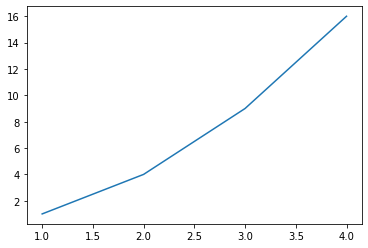

In [3]:
from matplotlib import pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 9, 16]
plt.plot(x, y)  # by default, plot a line
plt.show()  # show the figure

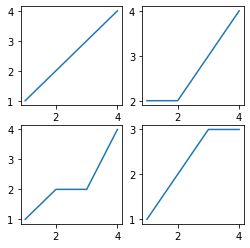

In [4]:
# plot subfigures

fig=plt.figure(num=1,figsize=(4,4))
ax1=fig.add_subplot(221) 
ax1.plot([1,2,3,4],[1,2,3,4])   
ax2=fig.add_subplot(222)
ax2.plot([1,2,3,4],[2,2,3,4])
ax3=fig.add_subplot(223)
ax3.plot([1,2,3,4],[1,2,2,4])
ax4=fig.add_subplot(224)
ax4.plot([1,2,3,4],[1,2,3,3])

plt.show()

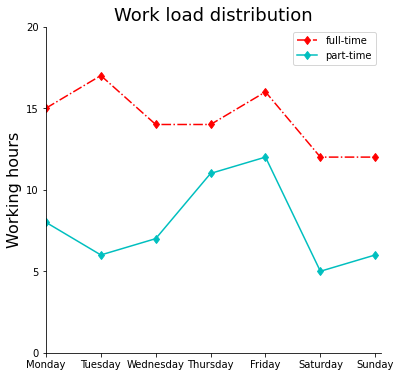

In [3]:
## a complete example 

import matplotlib.pyplot as plt
import numpy as np

fulltime=[15,17,14,14,16,12,12]  
parttime=[8,6,7,11,12,5,6]


x=np.arange(1,8)
fig=plt.figure(num=1,figsize=(6,6))


ax=fig.add_subplot(111)   # only 1 figure
ax.plot(x,fulltime,"r-.d",label="full-time") 
ax.plot(x,parttime,"c-d",label="part-time")


ax.spines['right'].set_visible(False)  # remove the right edge
ax.spines['top'].set_visible(False)  # remove the top edge


ax.set_xlim([1,7.1])     # set the range of x-axis
ax.set_ylim([0,20])      # set the range of y-axis


ax.set_xticks(np.linspace(1,7,7))      
ax.set_yticks(np.linspace(0,20,5))   # set the ticks, 5 points

ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

ax.set_ylabel('Working hours',fontsize=16)   # set the label of y-axis

ax.set_title('Work load distribution',fontsize=18)  #  set the title

#ax.legend(loc=3,labelspacing=1,handlelength=3,fontsize=14,shadow=True)  # create legend
ax.legend()

plt.show()


In [4]:
import pandas as pd
nested_dict = {'red_wine': {1998:1, 1999:1, 2000:2},
   'white_wine': {1998:3, 1999:2, 2000:0}}
df = pd.DataFrame(nested_dict)
print(df)

      red_wine  white_wine
1998         1           3
1999         1           2
2000         2           0


In [5]:
print(df[0:1])

      red_wine  white_wine
1998         1           3


In [6]:
print(df.iloc[[0]])

      red_wine  white_wine
1998         1           3
